# Importance of Features

Topics:
+ Feature importance via decision trees
+ Feature importance via ensemble classifers
+ Feature importance via linear classifers

In [18]:
import pandas, seaborn
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from dtreeviz.trees import *


In [19]:
iris = pandas.read_csv('../Datasets/iris50.csv')
admission = pandas.read_csv('../Datasets/admission.csv')
cancer = pandas.read_csv('../Datasets/breast-cancer-wisconsin.csv')
diabetes = pandas.read_csv('../Datasets/diabetes.csv')

dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=21, max_depth=5)
svc = LinearSVC(dual=False)
nb = GaussianNB()

cv = ShuffleSplit(n_splits=30)


In [20]:
iris["Species"].unique()

array([0, 1], dtype=int64)

In [21]:
def evaluate(model, X, y, cv, scoring=['accuracy']):
    result = cross_validate(model, X, y, cv=cv, scoring=scoring)
    print(model)
    for s in scoring:
        print('\t', result['test_' + s].mean().round(2))

Why are we interested in the importance of features?

In [22]:
X, y = iris.drop(columns=['Species']), iris['Species']

In [23]:
evaluate(dt, X, y, cv, ['accuracy','precision','recall'])

DecisionTreeClassifier(max_depth=5)
	 0.89
	 0.84
	 0.86


c:\users\msaha1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\msaha1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


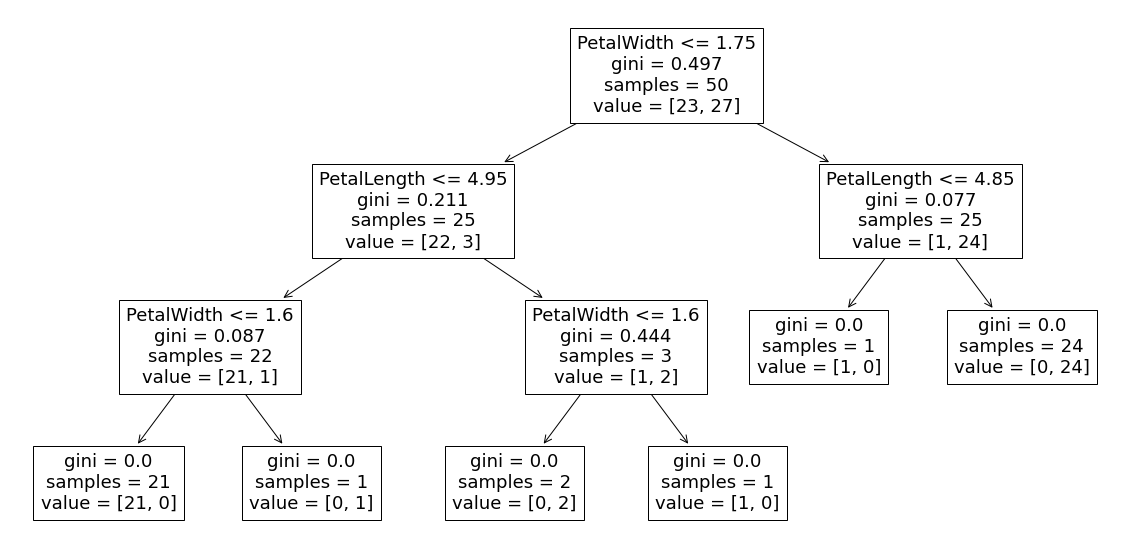

In [24]:
dt.fit(X, y)
fig = plt.figure(figsize = (20, 10))
_ = plot_tree(dt, feature_names = X.columns)

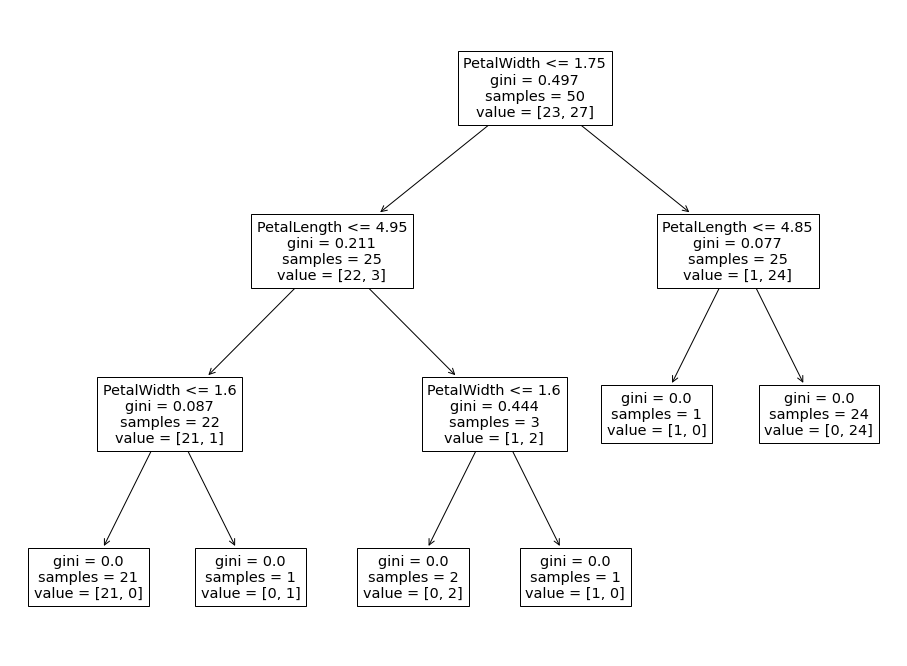

In [25]:
dt.fit(X,y)
fig = pyplot.figure(figsize=(16,12))
_ = plot_tree(dt, feature_names=X.columns)

In [26]:
dt.feature_importances_

array([0.       , 0.       , 0.1593227, 0.8406773])

In [27]:
dt.feature_importances_

array([0.       , 0.       , 0.1593227, 0.8406773])

In [28]:
X.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

In [29]:
evaluate(rf, X, y, cv, ['accuracy','precision','recall'])

c:\users\msaha1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\msaha1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(max_depth=5, n_estimators=21)
	 0.91
	 0.87
	 0.86


In [30]:
rf.fit(X,y)
rf.feature_importances_

array([0.06148214, 0.03623049, 0.34514736, 0.55714   ])

In [28]:
X.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

In [16]:
iris['Species'].unique()

array([0, 1], dtype=int64)

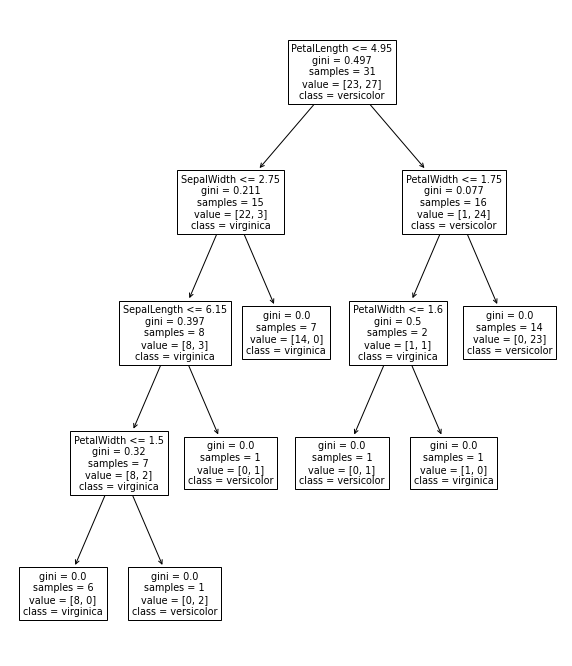

In [47]:
fig = pyplot.figure(figsize=(10,12))
_ = plot_tree(rf.estimators_[5], feature_names=X.columns, class_names=['virginica','versicolor'])

In [35]:
rf.estimators_[0].feature_importances_

array([0.22062228, 0.        , 0.64046739, 0.13891033])

Based on a random forest, built from 21 random decision trees, petal width and petal length are the two most important features.

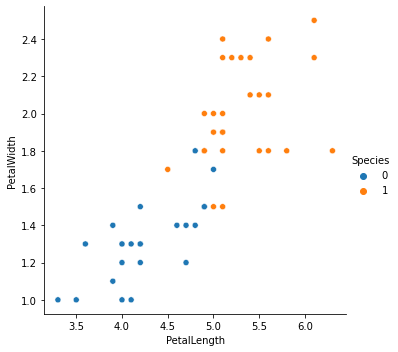

In [38]:
seaborn.relplot(data=iris, x='PetalLength', y='PetalWidth', hue='Species')

Let's make some predictions

In [48]:
iris.sample(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
41,7.0,3.2,4.7,1.4,0
29,6.3,3.4,5.6,2.4,1
34,6.7,2.5,5.8,1.8,1


In [59]:
new_data = [
    [7.3, 3.0, 4.5, 1.2],
    [7.3, 3.0, 4.5, 1.3],
    [7.3, 3.0, 4.5, 1.4],
    [7.3, 3.0, 4.5, 1.77],
    [7.3, 3.0, 5.5, 2.2],
]
rf.predict(new_data)

array([0, 0, 0, 1, 1])

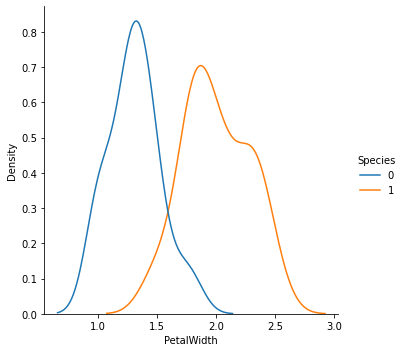

In [54]:
seaborn.displot(data=iris, x='PetalWidth', hue='Species', kind='kde')

If we are allowed to pick only ONE most important feature, this is the best we can do with assessing "the threshold".

What if we are allowed to use two most important features, how do we determine/study this threshold?

#### Support vector

In [60]:
svm = SVC(kernel='linear')

In [61]:
evaluate(svm, X, y, cv, ['accuracy','precision','recall'])

SVC(kernel='linear')
	 0.94
	 0.89
	 0.97


/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
evaluate(rf, X, y, cv, ['accuracy','precision','recall'])

RandomForestClassifier(max_depth=5, n_estimators=21)
	 0.87
	 0.88
	 0.9


In [64]:
svm.fit(X,y)

SVC(kernel='linear')

In [65]:
svm.coef_, svm.intercept_

(array([[-0.8744778 , -0.7465367 ,  1.63784899,  2.02211562]]),
 array([-3.65591545]))

In [66]:
X.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

In [75]:
def svm_predict(model, data):
    for d in data:
        print(model.coef_.dot(d) + model.intercept_)

In [76]:
svm_predict(svm, new_data)

[-2.48235428]
[-2.28014272]
[-2.07793115]
[-1.32974837]
[1.17761034]


In [71]:
svm.coef_.dot(new_data[0]) + svm.intercept_

array([-2.48235428])

In [77]:
svm.coef_, svm.intercept_

(array([[-0.8744778 , -0.7465367 ,  1.63784899,  2.02211562]]),
 array([-3.65591545]))

In [78]:
X.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

y = w*x + b

y = (10, 1) * (x1, x2) + b = 10x1 + x2 + b

difference between (3,5) and (3,6) is not as drastic as the difference between (3,5) and (4,5)


For linear models, the coefficients tell us how important the features are.

In [79]:
X, y = iris[['PetalWidth','PetalLength']], iris['Species']
evaluate(svm, X, y, cv, ['accuracy','precision','recall'])

SVC(kernel='linear')
	 0.91
	 0.89
	 0.97


In [82]:
import numpy
def show_boundary(X, y, feature1, feature2):
    X = X[[feature1, feature2]]
    x_min, x_max = X[X.columns[0]].min(),  X[X.columns[0]].max()
    seaborn.relplot(x=X[X.columns[0]], y=X[X.columns[1]], hue=y)
    
#     svm_model = LinearSVC(dual=False)
    svm_model = SVC(kernel='linear')

    svm_model.fit(X,y)
    w = svm_model.coef_[0]   
    b = svm_model.intercept_[0]
    f1 = numpy.linspace(x_min, x_max)
    f2 = -(w[0] / w[1]) * f1 - b / w[1]
    pyplot.plot(f1, f2, c='black');

w - coefficient
b - intercept

(w1, w2) * (f1, f2) + b = 0

w1*f1 + w2*f2 + b = 0

f2 = -w1*f1/w2 -b/w2



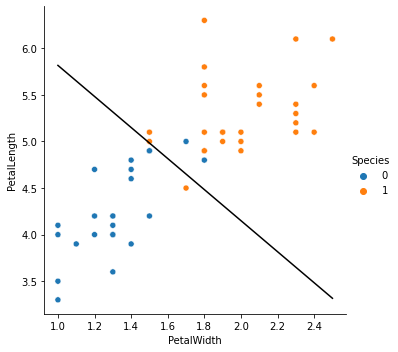

In [84]:
show_boundary(X, y, 'PetalWidth', 'PetalLength')

In [85]:
X, y = iris[['PetalWidth','PetalLength']], iris['Species']
svm.fit(X,y)

SVC(kernel='linear')

In [88]:
svm.predict([
    [1.8,4.45],
    [1.8,4.6]
])

array([0, 1])

In [2]:

# fig = pdotlot.figure(figsize=(25,20))
# _=tree.plot_tree(model, feature_names=X.columns, class_names=['setosa','versicolor'])

# from dtreeviz.trees import *
# viz = dtreeviz(model, X, y,feature_names=X.columns, fancy=True)  
# viz.view() 

In [ ]:
import pandas
import seaborn
import numpy
from matplotlib import pyplot
from sklearn.svm import LinearSVC, SVC

def show_boundary(X, y, feature1, feature2):
    X = X[[feature1, feature2]]
    x_min, x_max = X[X.columns[0]].min(),  X[X.columns[0]].max()
    seaborn.relplot(x=X[X.columns[0]], y=X[X.columns[1]], hue=y)
    
#     svm_model = LinearSVC(dual=False)
    svm_model = SVC(kernel='linear')

    svm_model.fit(X,y)
    w = svm_model.coef_[0]   
    b = svm_model.intercept_[0]
    f1 = numpy.linspace(x_min, x_max)
    f2 = -(w[0] / w[1]) * f1 - b / w[1]
    pyplot.plot(f1, f2, c='black');

iris = pandas.read_csv('../../Datasets/iris50.csv')
X, y = iris.drop(columns=['Species']), iris['Species']
# show_boundary(X,y,'PetalWidth','PetalLength')